In [40]:
## basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ML Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#ML evulation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
## imprt the Dataset
from google.colab import files
uploaded = files.upload()


Saving Student_Marks.csv to Student_Marks (1).csv


In [41]:
## read the file
df = pd.read_csv('Student_Marks.csv')
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [42]:
## Check the null Values
df.isnull().sum()

,0
number_courses,0
time_study,0
Marks,0


In [12]:
## Check the Basic statistics
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


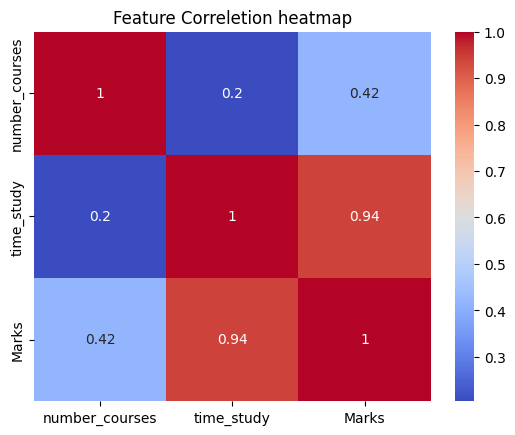

In [15]:
sns.heatmap(df.corr(), annot=True, cmap ='coolwarm')
plt.title('Feature Correletion heatmap')
plt.show()

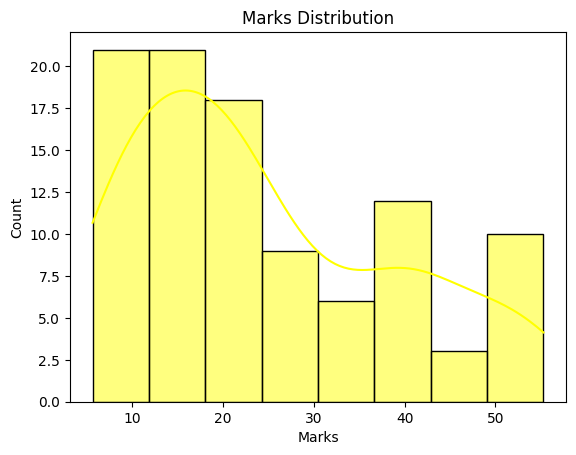

In [22]:
## Marks Distribution
sns.histplot(df['Marks'], kde=True, color='yellow')
plt.title('Marks Distribution')
plt.show()

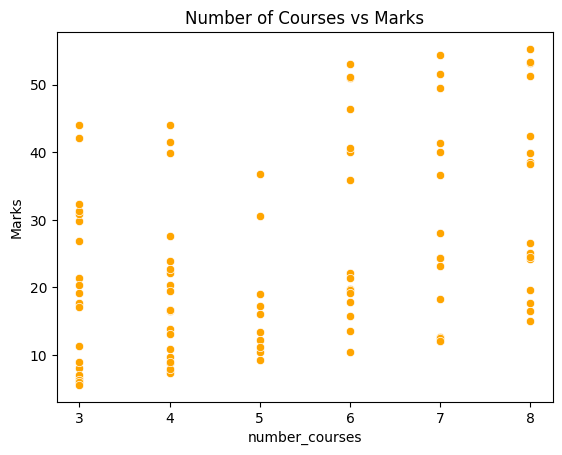

In [18]:
sns.scatterplot(x='number_courses', y='Marks',data=df, color='Orange')
plt.title('Number of Courses vs Marks')
plt.show()

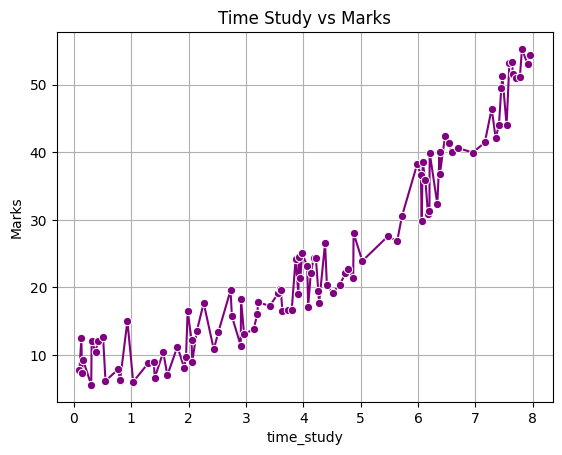

In [24]:
sns.lineplot(x='time_study', y='Marks', data=df, color='purple', marker='o')
plt.title('Time Study vs Marks')
plt.grid()
plt.show()

In [26]:
x = df[['number_courses','time_study']]
y = df['Marks']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
y_pred = model.predict(x_test)

In [39]:
MAE = mean_absolute_error(y_pred, y_test)
MSE = mean_squared_error(y_pred, y_test)
R2 = r2_score(y_pred, y_test)

print('MAE:',MAE)
print('MSE:',MSE)
print('R2:',R2)

MAE: 1.2385355000000065
MSE: 2.1309921295550263
R2: 0.9914313439506529


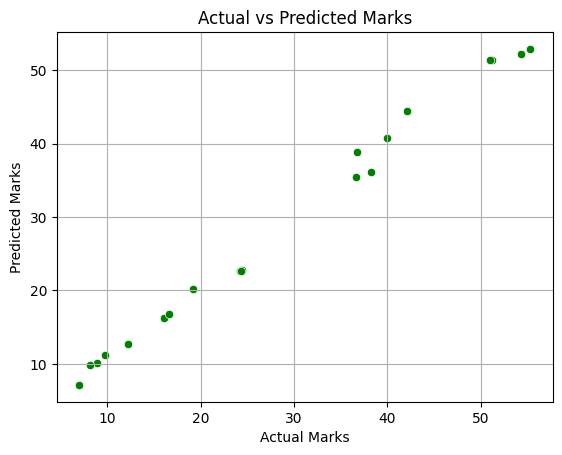

In [44]:
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual vs Predicted Marks')
plt.grid()
plt.show()

In [45]:
new_data = pd.DataFrame({'number_courses':[3], 'time_study':[5]})
predicted_marks = model.predict(new_data)
print('Predicted Marks:', predicted_marks)

Predicted Marks: [23.64619]
